In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

### d) Logistic regression

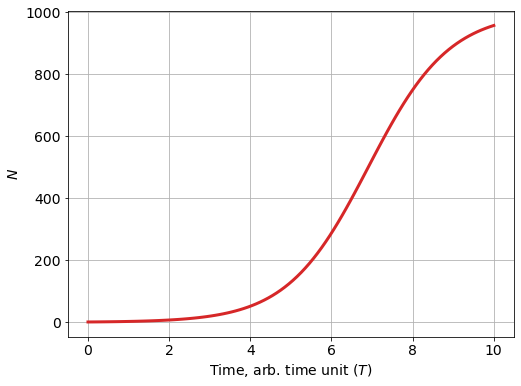

In [307]:
def log_reg(t, alpha, K):
    return K*np.exp(alpha*t) / ( K-1 + np.exp(alpha*t) )

K = 1000  # Maximum number of particles
alpha = 1  # division rate - divisions per unit of time
t = np.linspace(0,10, 100)

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ts, log_reg(t, alpha, K), color='C3', linewidth=3)
ax.set_xlabel(r'Time, arb. time unit $(T)$')
ax.set_ylabel(r'$N$')
ax.grid()

### e) Numerical solution

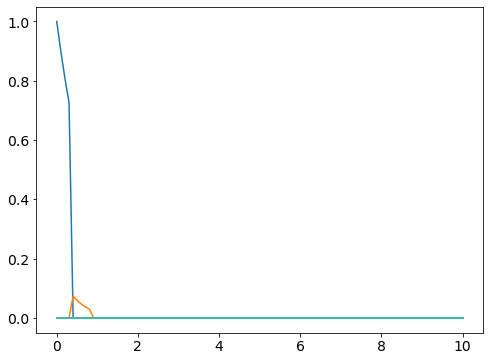

In [216]:
# Declarations
K = 10
P = np.zeros((len(ts), K))
l = np.arange(1,K)
alpha = 1  # one division per unit of time
deltat = t[1]-t[0]  # From the cell above

# Initialize system
P[0, 0] = 1  # Initially only state 1

for i in range(1,len(t)):
    # Calculate for all states up to K-1 at the same time
    sigma = np.random.uniform(0,1, K-1)
    Pjump = l*alpha*deltat
    jump = np.where(Pjump >= sigma)[0]  # These are the ls that jump
    no_jump = np.where(Pjump < sigma)[0]
    
    assert np.max(jump+1) <= 10
    P[i,jump+1] = l[jump]*alpha*deltat*P[i-1,jump]  # Jump from Pl -> Pl+1
    P[i,no_jump] = (1-l[no_jump]*alpha*deltat)*P[i-1,no_jump]  # Nothing happens

    
# Plot
fig, ax = plt.subplots(figsize=(8,6))
for i in range(K): 
    ax.plot(t, P[:,i])

    

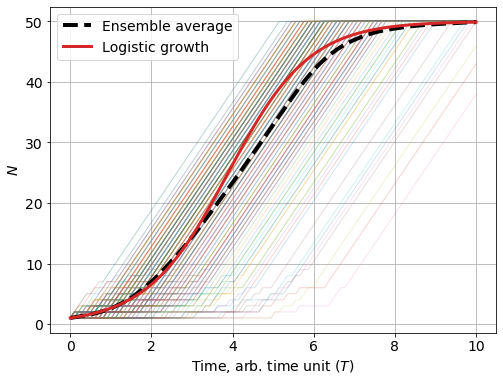

In [308]:
# Just using numbers
# Declarations
K = 50
traj = 200
l = np.zeros((len(ts), traj))  # Number of particles
alpha = 1  # one division per unit of time
deltat = t[1]-t[0]  # From the cell above

# Initialize system
l[0,:] = 1  # One particle at the beginning

for i in range(0,len(t)-1):
    # Calculate for all states up to K-1 at the same time
    sigma = np.random.uniform(0,1, traj)
    Pjump = l[i,:]*alpha*deltat
    increase = np.where(Pjump >= sigma)[0]
    no_increase = np.where(Pjump < sigma)[0]

    l[i+1, increase] = l[i,increase]+(1 - np.floor(l[i,increase]/K))
    l[i+1, no_increase] = l[i, no_increase]
      
# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, l, linewidth=1, alpha=0.2)
ax.plot(t, np.mean(l, axis=1), linewidth=4, linestyle='--', color='k', label="Ensemble average")
ax.plot(ts, log_reg(t, alpha, K), color='C3', linewidth=3, label="Logistic growth")
ax.grid()
ax.set_xlabel(r'Time, arb. time unit $(T)$')
ax.set_ylabel(r'$N$')
ax.legend(loc='best')